In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("GOOG.csv", date_parser=True)

In [3]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,2.490664,2.591785,2.390042,2.499133,2.499133,897427216
1,2004-08-20,2.515820,2.716817,2.503118,2.697639,2.697639,458857488
2,2004-08-23,2.758411,2.826406,2.716070,2.724787,2.724787,366857939
3,2004-08-24,2.770615,2.779581,2.579581,2.611960,2.611960,306396159
4,2004-08-25,2.614201,2.689918,2.587302,2.640104,2.640104,184645512


In [4]:
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
4714,2023-05-11,115.860001,118.440002,114.930000,116.900002,116.900002,57115100
4715,2023-05-12,117.000000,118.260002,116.550003,117.919998,117.919998,31272500
4716,2023-05-15,116.489998,118.794998,116.480003,116.959999,116.959999,22107900
4717,2023-05-16,116.830002,121.199997,116.830002,120.089996,120.089996,32370100
4718,2023-05-17,120.180000,122.279999,119.459999,121.480003,121.480003,26651400


In [5]:
training_data = data[data['Date'] < '2022-10-01'].copy()
data_training = training_data.copy()

In [6]:
training_data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
4557,2022-09-26,98.610001,100.440002,98.379997,98.809998,98.809998,22437900
4558,2022-09-27,99.910004,100.459999,97.339996,98.089996,98.089996,24225000
4559,2022-09-28,98.019997,101.400002,97.800003,100.739998,100.739998,24617000
4560,2022-09-29,99.300003,99.300003,96.519997,98.089996,98.089996,21921500
4561,2022-09-30,97.730003,99.494003,96.029999,96.150002,96.150002,26277800


In [7]:
testing_data = data[data['Date'] >= '2022-10-01'].copy()

In [8]:
testing_data

,Date,Open,High,Low,Close,Adj Close,Volume
4562,2022-10-03,97.220001,99.970001,97.019997,99.300003,99.300003,24840000
4563,2022-10-04,101.040001,102.720001,101.040001,102.410004,102.410004,22580900
4564,2022-10-05,100.690002,102.739998,99.739998,102.220001,102.220001,18475500
4565,2022-10-06,101.500000,103.730003,101.500000,102.239998,102.239998,17156200
4566,2022-10-07,100.650002,101.419998,99.209999,99.570000,99.570000,24249900
...,...,...,...,...,...,...,...
4714,2023-05-11,115.860001,118.440002,114.930000,116.900002,116.900002,57115100
4715,2023-05-12,117.000000,118.260002,116.550003,117.919998,117.919998,31272500
4716,2023-05-15,116.489998,118.794998,116.480003,116.959999,116.959999,22107900
4717,2023-05-16,116.830002,121.199997,116.830002,120.089996,120.089996,32370100


In [9]:
training_data = training_data.drop(['Date', 'Adj Close'], axis = 1)

In [10]:
training_data.head()

,Open,High,Low,Close,Volume
0,2.490664,2.591785,2.390042,2.499133,897427216
1,2.515820,2.716817,2.503118,2.697639,458857488
2,2.758411,2.826406,2.716070,2.724787,366857939
3,2.770615,2.779581,2.579581,2.611960,306396159
4,2.614201,2.689918,2.587302,2.640104,184645512


In [11]:
sc = MinMaxScaler()
training_data= sc.fit_transform(training_data)
training_data

array([[1.35039790e-04, 3.86337794e-04, 0.00000000e+00, 5.54588186e-05,
        5.43577158e-01],
       [3.03427861e-04, 1.22230316e-03, 7.66630177e-04, 1.39474206e-03,
        2.77885883e-01],
       [1.92727230e-03, 1.95501646e-03, 2.21039746e-03, 1.57790459e-03,
        2.22151354e-01],
       ...,
       [6.39584879e-01, 6.61019198e-01, 6.46858354e-01, 6.62868392e-01,
        1.48173190e-02],
       [6.48152924e-01, 6.46978581e-01, 6.38180198e-01, 6.44989319e-01,
        1.31843499e-02],
       [6.37643730e-01, 6.48275667e-01, 6.34858120e-01, 6.31900539e-01,
        1.58234534e-02]])

In [12]:
X_train = []
y_train = []

In [13]:
training_data.shape[0]

4562

In [14]:
for i in range(60, training_data.shape[0]):
    X_train.append(training_data[i - 60 : i])
    y_train.append(training_data[i, 0])
    
X_train, y_train = np.array(X_train), np.array(y_train)

In [15]:
X_train.shape

(4502, 60, 5)

In [16]:
y_train.shape

(4502,)

In [17]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense

In [18]:
model = Sequential()

In [19]:
model.add(LSTM(units = 60, activation = 'relu', return_sequences = True, input_shape = (X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.2))


model.add(Dense(units = 1))


In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 60)            15840     
                                                                 
 dropout (Dropout)           (None, 60, 60)            0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 60)            29040     
                                                                 
 dropout_1 (Dropout)         (None, 60, 60)            0         
                                                                 
 lstm_2 (LSTM)               (None, 60, 80)            45120     
                                                                 
 dropout_2 (Dropout)         (None, 60, 80)            0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [21]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [22]:
X_train.shape

(4502, 60, 5)

In [23]:
y_train.shape

(4502,)

In [24]:
model.fit(X_train, y_train, epochs = 2, batch_size = 512)

Epoch 1/2
9/9 [==============================] - 8s 559ms/step - loss: 0.0630
Epoch 2/2
9/9 [==============================] - 5s 594ms/step - loss: 0.0124


In [25]:
testing_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
4562,2022-10-03,97.220001,99.970001,97.019997,99.300003,99.300003,24840000
4563,2022-10-04,101.040001,102.720001,101.040001,102.410004,102.410004,22580900
4564,2022-10-05,100.690002,102.739998,99.739998,102.220001,102.220001,18475500
4565,2022-10-06,101.500000,103.730003,101.500000,102.239998,102.239998,17156200
4566,2022-10-07,100.650002,101.419998,99.209999,99.570000,99.570000,24249900


In [26]:
past_60_days = data_training.tail(60)
testing_data = past_60_days.append(testing_data, ignore_index = True)
testing_data = testing_data.drop(['Date', 'Adj Close'], axis = 1)
testing_data.head()

C:\Users\ayush\AppData\Local\Temp\ipykernel_3632\2343619103.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  testing_data = past_60_days.append(testing_data, ignore_index = True)


,Open,High,Low,Close,Volume
0,117.550003,120.434998,117.514000,120.168503,29082000
1,118.650002,118.794502,116.234497,116.522499,26718000
2,116.838501,117.849503,114.614998,114.849503,24970000
3,112.639000,115.156998,111.822998,112.186996,38958000
4,110.825996,111.987503,109.325500,111.440002,32366000


In [27]:
testing_data = sc.transform(testing_data)
testing_data

array([[0.77031393, 0.7882874 , 0.78051488, 0.79394892, 0.01752227],
       [0.77767705, 0.77731902, 0.77184013, 0.76935001, 0.01609013],
       [0.76555131, 0.77100075, 0.76086029, 0.75806261, 0.01503117],
       ...,
       [0.76321852, 0.77732234, 0.77350461, 0.77230174, 0.01329727],
       [0.76549442, 0.79340219, 0.77587752, 0.79341925, 0.01951425],
       [0.78791848, 0.80062309, 0.79370832, 0.80279737, 0.01604979]])

In [28]:
X_test = []
y_test = []

for i in range(60, testing_data.shape[0]):
    X_test.append(testing_data[i - 60 : i])
    y_test.append(testing_data[i, 0])

X_test, y_test = np.array(X_test), np.array(y_test)
X_test.shape, y_test.shape

((157, 60, 5), (157,))

In [29]:
y_pred = model.predict(X_test)

5/5 [==============================] - 1s 27ms/step


In [30]:
type(X_test)

numpy.ndarray

In [31]:
y_pred.shape

(157, 1)

In [32]:
sc.scale_

array([6.69375383e-03, 6.68601135e-03, 6.77977800e-03, 6.74681491e-03,
       6.05813073e-10])

In [33]:
scale = 1/6.69375383e-03
scale

149.39300509053825

In [39]:
y_pred = y_pred*scale
y_test = y_test*scale

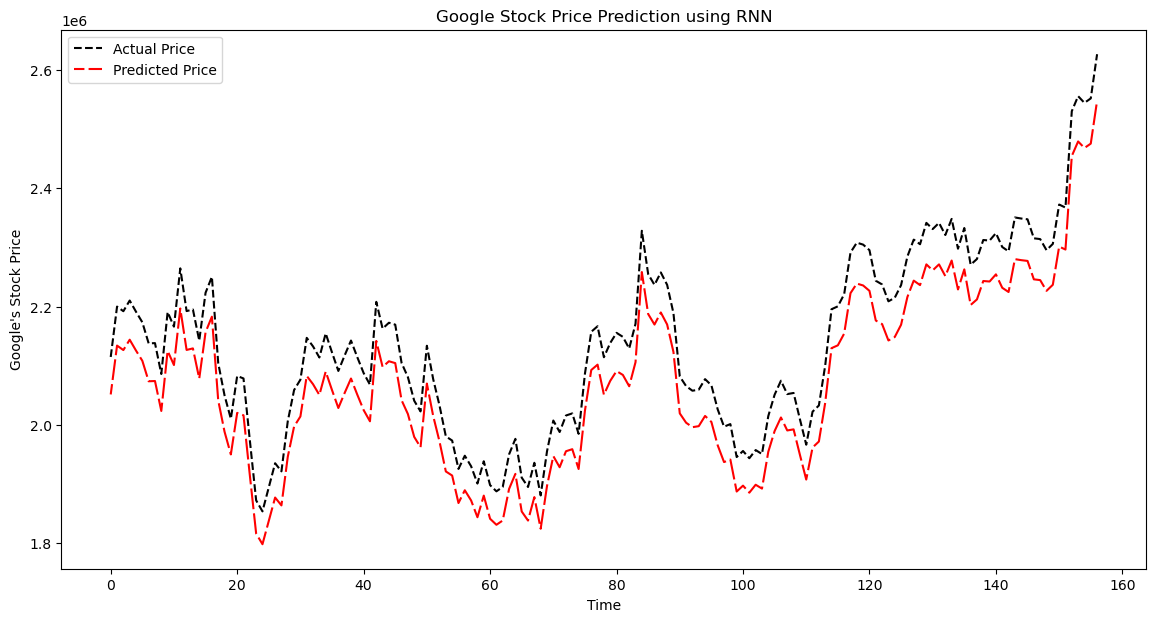

In [40]:
# Visualising
plt.figure(figsize=(14,7))
plt.plot(y_test, color = 'black', label = 'Actual Price', linestyle='--')
plt.plot(y_pred, color = 'red', label = 'Predicted Price', linestyle=(5, (10, 2)))
plt.title('Google Stock Price Prediction using RNN')
plt.xlabel('Time')
plt.ylabel('Google\'s Stock Price')
plt.legend()
plt.show()